<a href="https://colab.research.google.com/github/nitishast/TF/blob/master/K_means_clustering_on_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import important library such as pandas, seaborn, sklearn etc.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
df = pd.read_csv("cars.csv")

In [20]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

## Preprocessing data 

In [21]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [23]:
#Using label encoder and turning categorical data into numbers

le = LabelEncoder()
le.fit(df['brand'])

LabelEncoder()

In [0]:
df['brand'] = le.transform(df['brand'])

In [25]:
df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,2
1,31.9,4,89,71,1925,14,1980,0
2,17.0,8,302,140,3449,11,1971,2
3,15.0,8,400,150,3761,10,1971,2
4,30.5,4,98,63,2051,17,1978,2


In [26]:
# Need to convert object type into integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg            261 non-null float64
cylinders      261 non-null int64
cubicinches    261 non-null object
hp             261 non-null int64
weightlbs      261 non-null object
time-to-60     261 non-null int64
year           261 non-null int64
brand          261 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.4+ KB


In [32]:
## Fixing empty spaces

df = df.loc[df.cubicinches != ' ']
df = df.loc[df.weightlbs != ' ']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
df[['cubicinches', 'weightlbs']] = df[['cubicinches', 'weightlbs']].astype(int)


In [37]:
L = list(le.inverse_transform(df['brand']))
d = dict(zip(le.classes_ , le.transform(le.classes_)))
print (d)

{' Europe.': 0, ' Japan.': 1, ' US.': 2}


## Creating number of clusters using K means clustering

In [0]:
from sklearn.cluster import KMeans

In [0]:
# Creating number of clusters using K means clustering

nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in nc]

score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

#print (score)

Text(0, 0.5, 'Score')

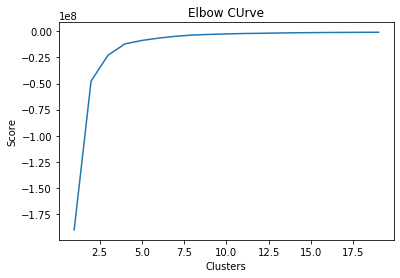

In [47]:
# Plotting an elbow diagram

plt.plot(nc,score)
plt.title('Elbow CUrve')
plt.xlabel('Clusters')
plt.ylabel('Score')



In [0]:
# We can figure out that 3 is the optimum cluster

In [0]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [50]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
df['cluster'] = kmeans.labels_

In [52]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,cluster
0,14.0,8,350,165,4209,12,1972,2,1
1,31.9,4,89,71,1925,14,1980,0,0
2,17.0,8,302,140,3449,11,1971,2,2
3,15.0,8,400,150,3761,10,1971,2,1
4,30.5,4,98,63,2051,17,1978,2,0


In [56]:
df.loc[df['cluster']==0].count() # We can see that 118 cars in one cluster

mpg            118
cylinders      118
cubicinches    118
hp             118
weightlbs      118
time-to-60     118
year           118
brand          118
cluster        118
dtype: int64

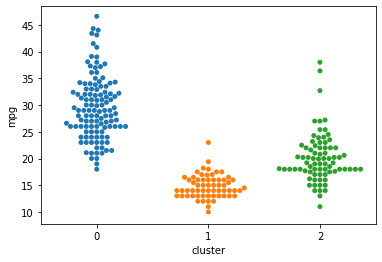

In [58]:
sns.swarmplot(x=df['cluster'],y=df['mpg'],data = df) #,hue = df['brand']

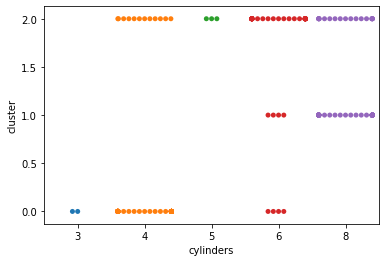

In [62]:
sns.swarmplot(x=df['cylinders'],y=df['cluster'],data = df) #,hue = df['brand']

### After all this analysis over many variables we see cluster divides based on hp, mpg, cylinders and time-to-60.

### cluster 0 contain small weight , less cylinder, less hp, more time to 100km/hr and more mpg.

### Cluster 1 contain slight weight more than cluseter1 , medium hp, medium cylinder *6, avg time to 100 km/hr and avg mileage.

### cluster 2 contain max weight vechicle, max cylinders , max hp, less time to 100 km/hr and less mpg.